In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("../../data/ex2data1.txt", delimiter=",")

In [96]:
X = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

def convertLabel(a):
    if a[0] != 1:
        return [-1]
    else:
        return [1]

train_X = data[:, :2]/100
train_Y = np.apply_along_axis(convertLabel, 1, data[:, 2:])
train_X[99%100:99%100+2, :]

array([[ 0.74775893,  0.89529813]])

In [97]:
W = tf.Variable(tf.truncated_normal([2,1], stddev=0.1))
b = tf.Variable(tf.ones([1]))
y_ = tf.matmul(X, W) + b
pred = tf.sign(y_)

In [120]:
learning_rate = 0.1
epochs = 10000
cost = tf.reduce_mean(tf.maximum(0., -y * y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [121]:
# Initializing the variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print sess.run(cost, {X: train_X, y: train_Y})
    for i in range(epochs):
        sess.run(optimizer, {X: train_X[i%100: i%100+1, :], y: train_Y[i%100:i%100+1, :]})
    print sess.run(cost, {X: train_X, y: train_Y})
    [w_, b_] = sess.run([W, b])

0.41245
0.00112304


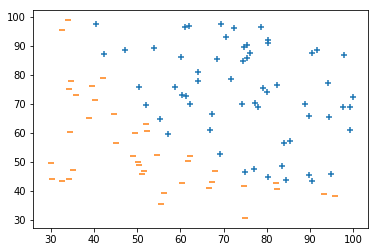

In [122]:
df = pd.DataFrame(data)
positive = df.loc[df[2] == 1]
nagetive = df.loc[df[2] == 0]
plt.scatter(positive[0], positive[1], marker="+")
plt.scatter(nagetive[0], nagetive[1], marker="_")
plt.show()

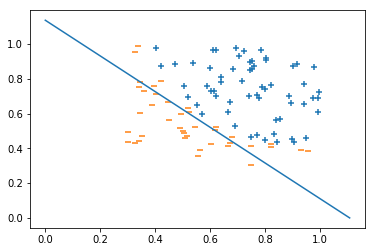

array([[ 0.09016022],
       [ 0.08799471]], dtype=float32)

In [123]:
plt.scatter(positive[0]/100, positive[1]/100, marker="+")
plt.scatter(nagetive[0]/100, nagetive[1]/100, marker="_")
plt.plot([(-b_/w_[0][0]), 0], [0, (-b_/w_[1][0])])
plt.show()
w_